In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
# Loading the dataset for training
train = pd.read_csv(r"C:\Users\HP\Downloads\train_ctrUa4K.csv")

In [3]:
# Loading the data set for testing
test = pd.read_csv(r"C:\Users\HP\Downloads\test_lAUu6dG.csv")

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


 Checking basic informations

In [6]:
train.shape 

(614, 13)

In [7]:
test.shape

(367, 12)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
# Target variable analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

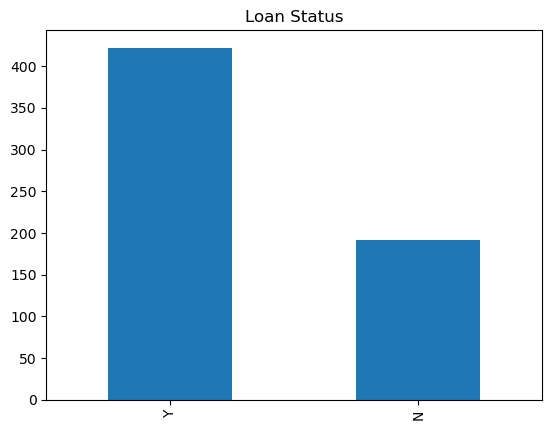

In [15]:
train['Loan_Status'].value_counts().plot.bar()
plt.title('Loan Status')
plt.show()

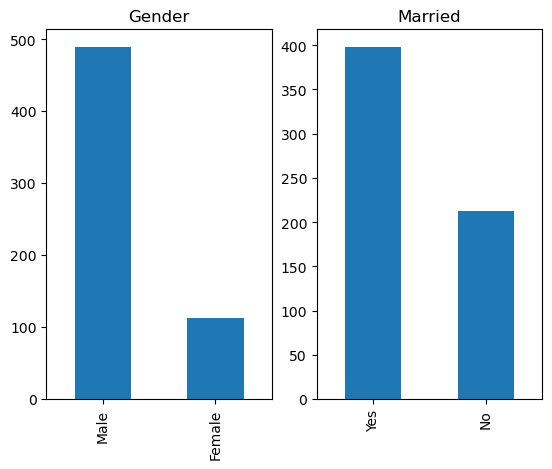

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2)
train['Gender'].value_counts().plot.bar(ax=ax1)
ax1.title.set_text('Gender')
train['Married'].value_counts().plot.bar(ax=ax2)
plt.title('Married')
plt.show()

More applicants are males also most of the applicants are married.

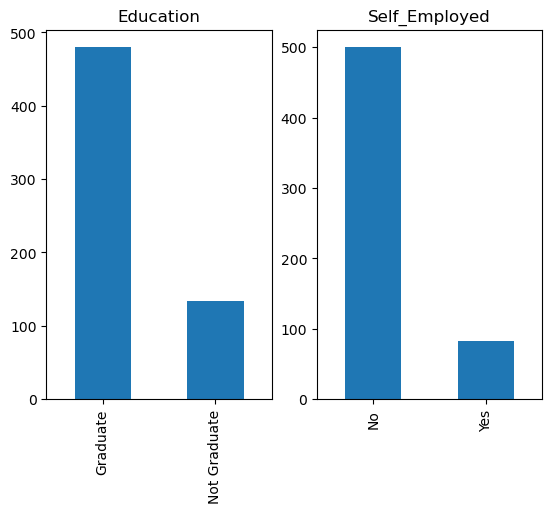

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2)
train['Education'].value_counts().plot.bar(ax=ax1)
ax1.title.set_text('Education')
train['Self_Employed'].value_counts().plot.bar(ax=ax2)
plt.title('Self_Employed')
plt.show()

Majority of the applicants are graduates while most of them are not self employed.

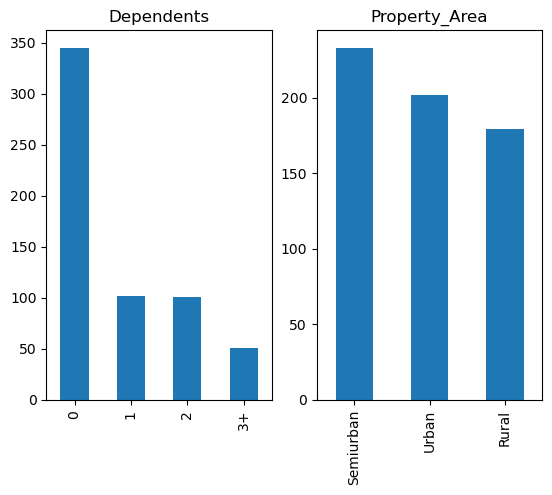

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2)
train['Dependents'].value_counts().plot.bar(ax=ax1)
ax1.title.set_text('Dependents')
train['Property_Area'].value_counts().plot.bar(ax=ax2)
plt.title('Property_Area')
plt.show()

Most of applicants do not have any dependents.More applicants are from semi urban area.

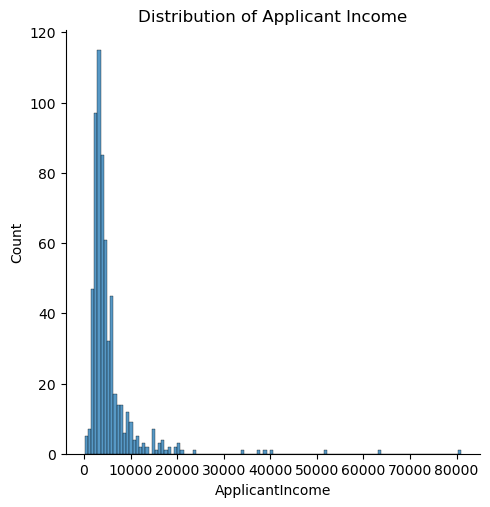

In [19]:
sns.displot(train['ApplicantIncome'])
plt.title('Distribution of Applicant Income')
plt.show()

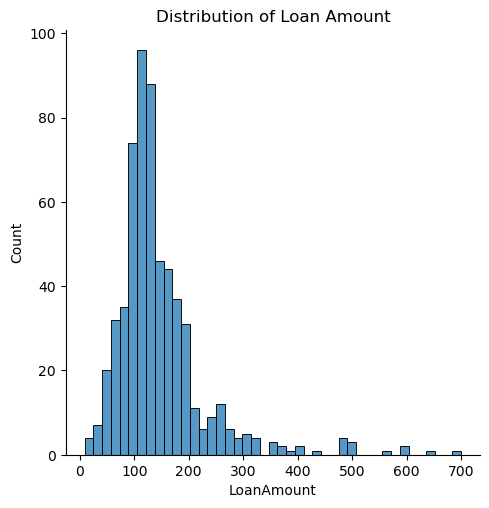

In [20]:
sns.displot(train['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.show()

The distribution is fairly nnormal in case of loan amount,But in Applicant income it is skewed.

In [21]:
# Checking for null values
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

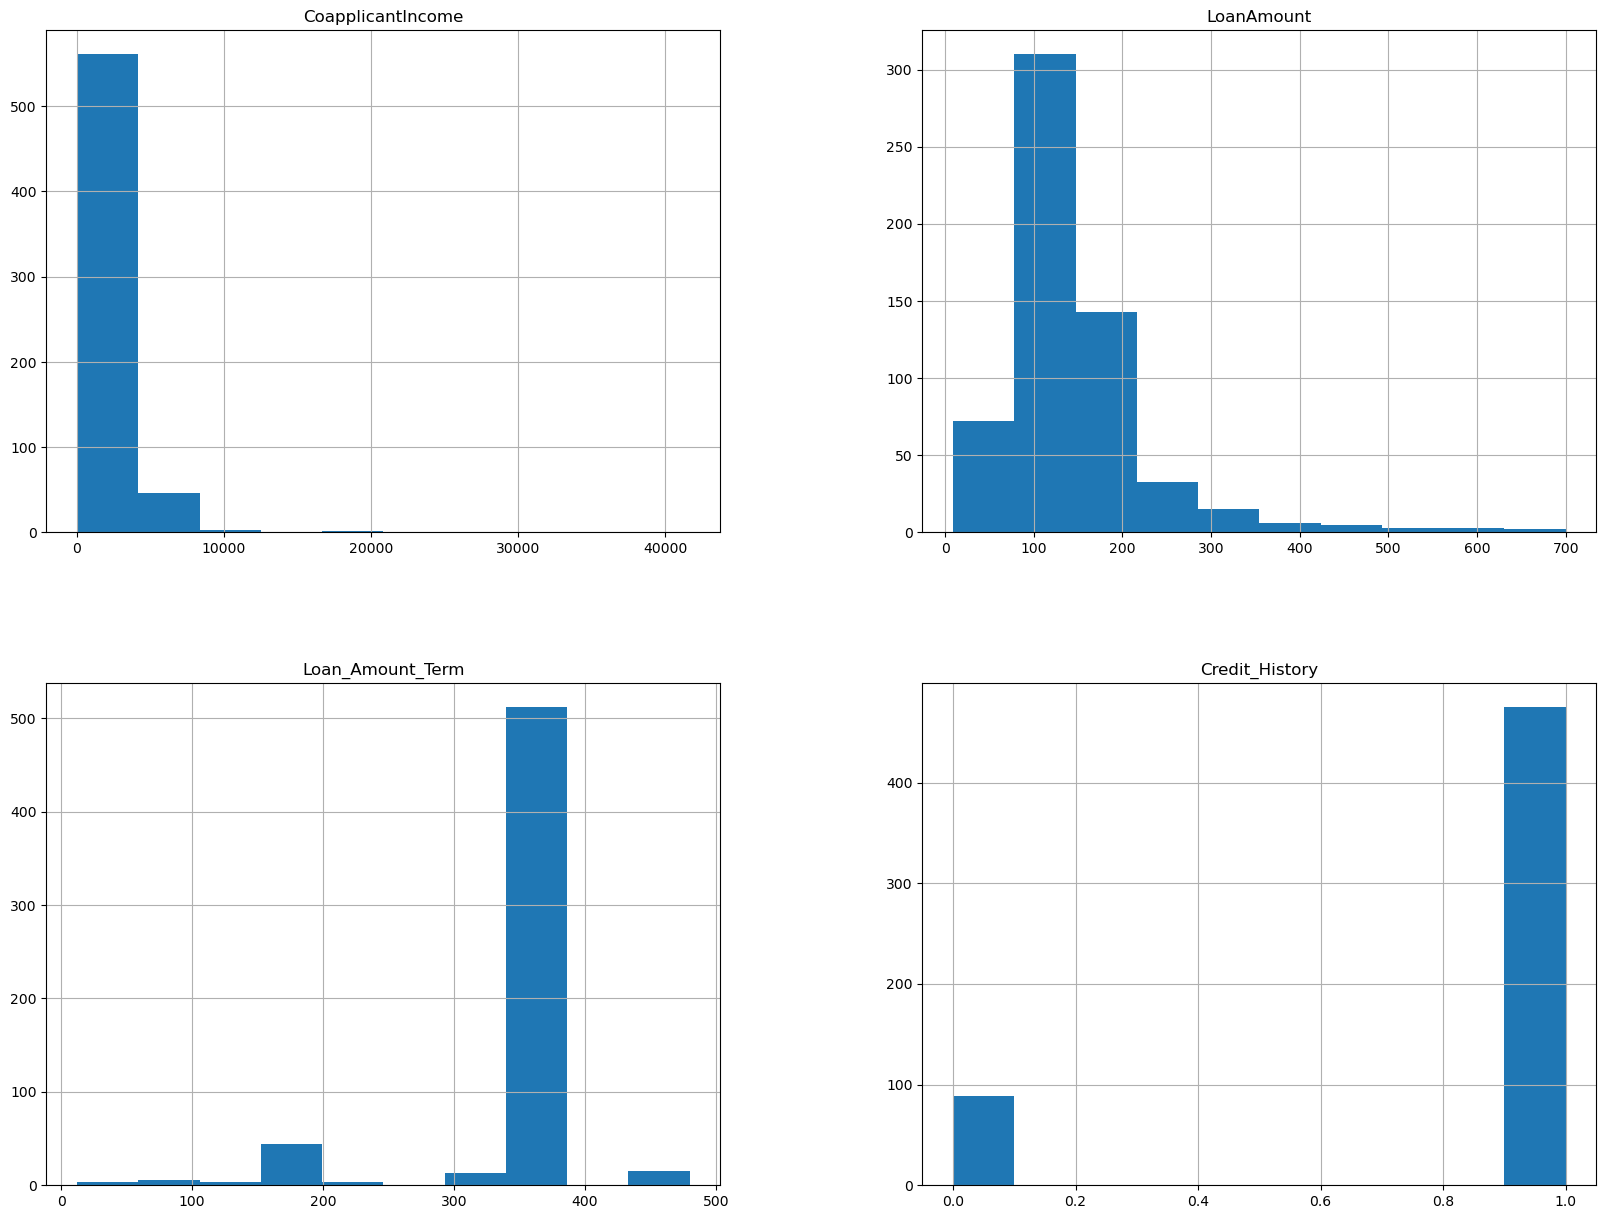

In [22]:
# to find the skewness
freqgraph = train.select_dtypes(include=['object','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

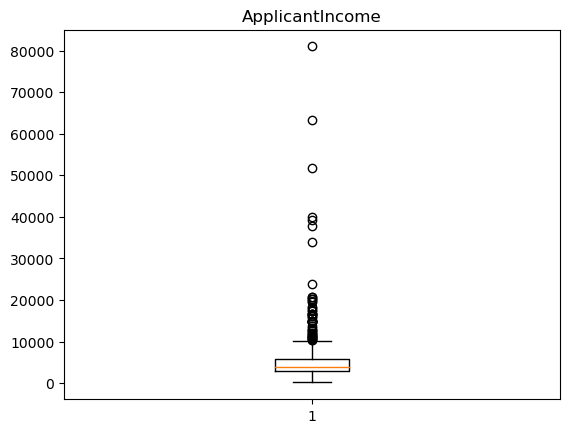

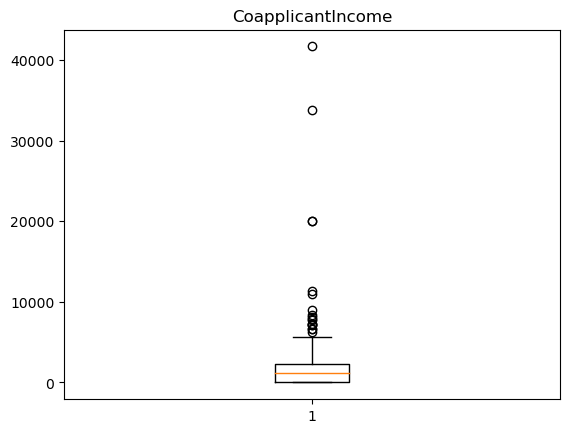

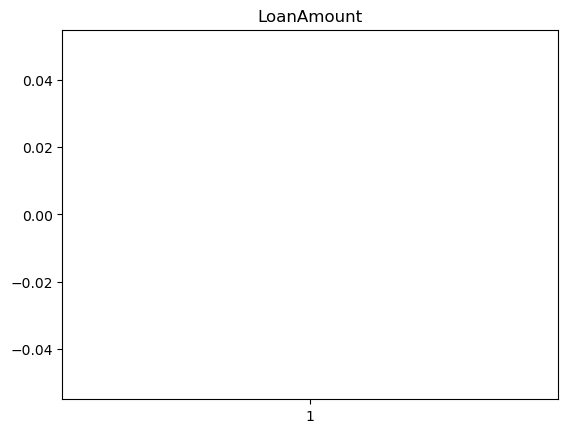

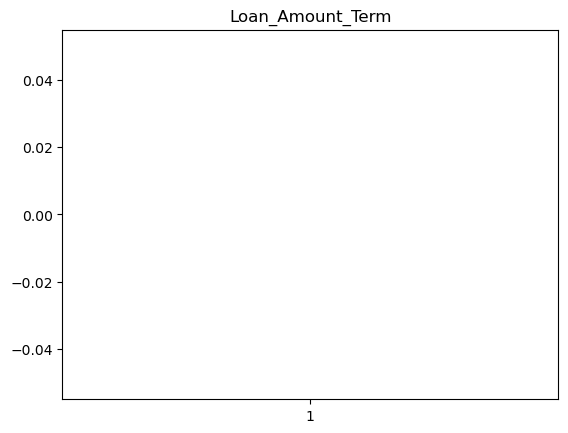

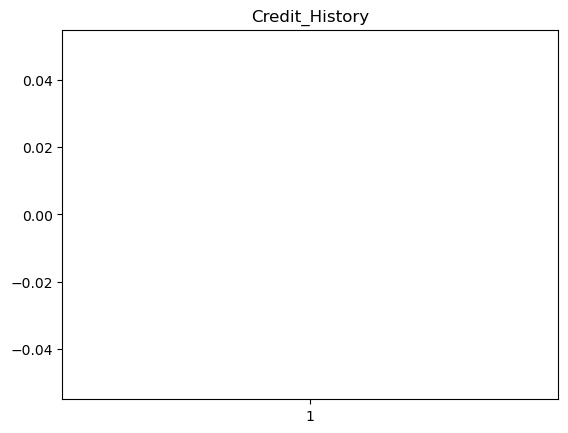

In [23]:
# To find the outliers,
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

## Preprocessing

### Missing values handling

In [24]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
# null value imputation in categorical columns with mode.
train['Gender']= train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']= train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [28]:
# filling missing values with median in numerical column.
train['LoanAmount']= train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']= train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History']= train['Credit_History'].fillna(train['Credit_History'].median())

In [29]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
test['Gender']= test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [32]:
test['LoanAmount']= test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']= test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History']= test['Credit_History'].fillna(test['Credit_History'].median())

In [33]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Outlier handling

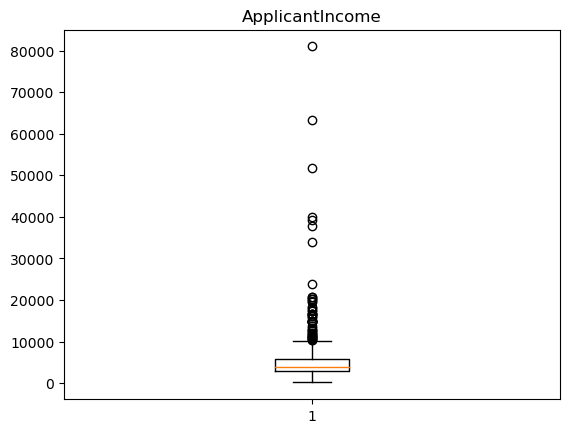

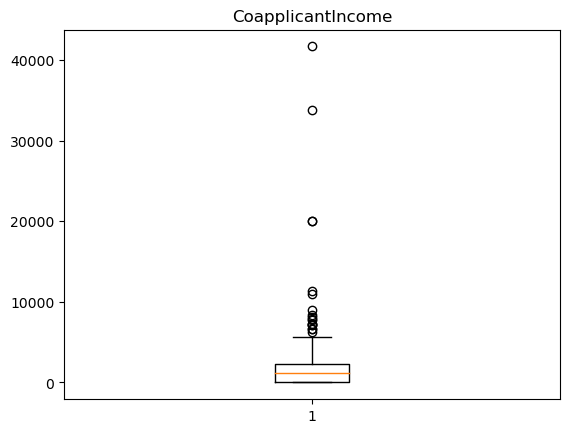

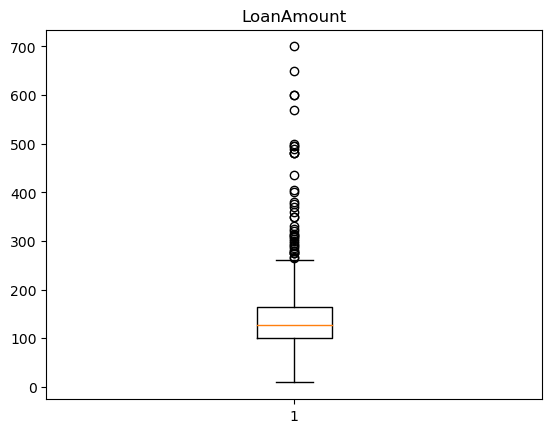

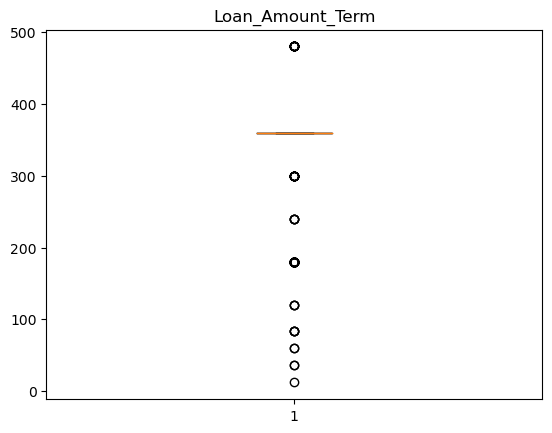

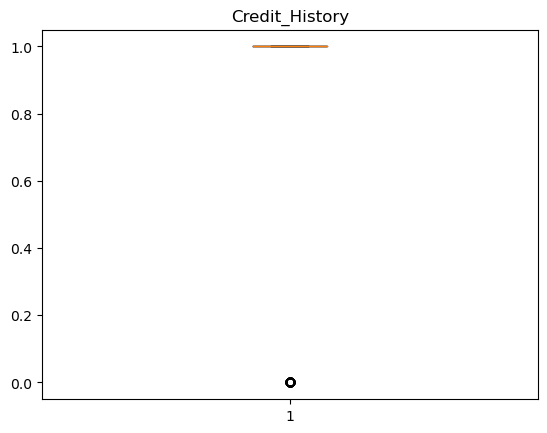

In [34]:
# To find the outliers,
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for i in num_cols:
    plt.figure()
    plt.boxplot(train[i])
    plt.title(i)

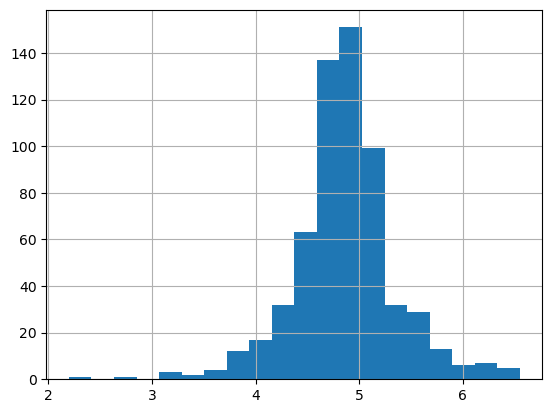

In [35]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [36]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

### Correlation matrix

<Axes: >

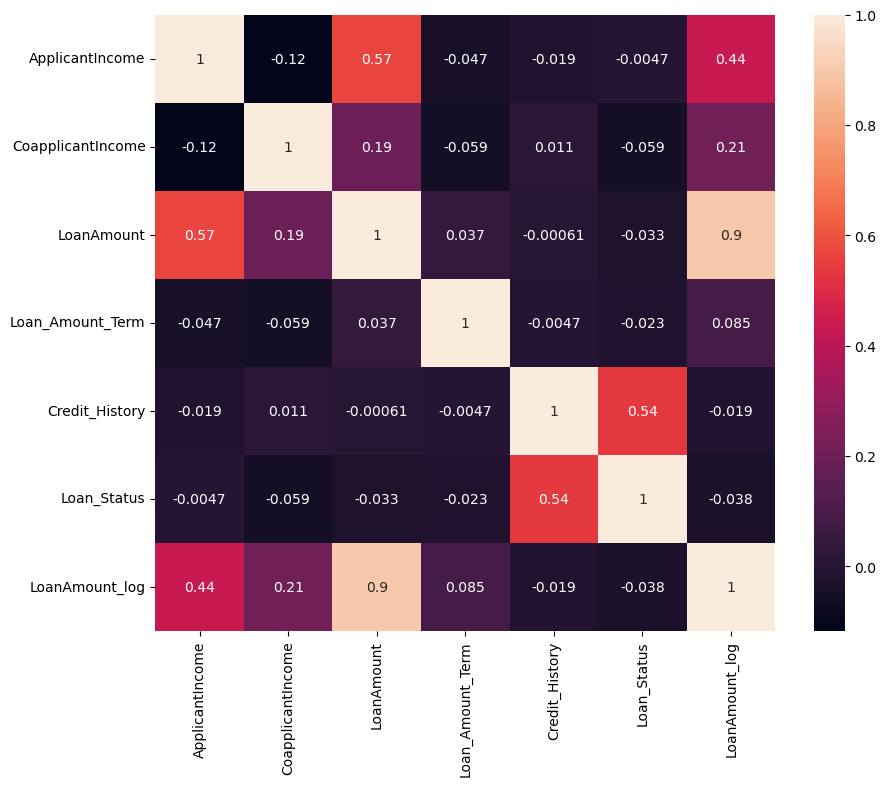

In [37]:
corr_graph = train.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr_graph, annot=True)

# Model Building

In [38]:
# droping the Loan_ID column as it has no effect on loan status
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [39]:
# Splitting trainig data into target and features
X = train.drop('Loan_Status', axis=1) # independent features
y = train.Loan_Status       # Target

### One hot encoding

In [40]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [41]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

## 1.Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
pred_cv = model.predict(x_cv)

In [44]:
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [45]:
pred_test = model.predict(test)

In [46]:
# importing sample submission data
submission = pd.read_csv(r"C:\Users\HP\Downloads\sample_submission_49d68Cx.csv")

In [47]:
submission['Loan_Status']=pred_test 

In [48]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [49]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [50]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic regressor model.csv')

In [51]:
submission.shape

(367, 2)

## Logistic Regression using stratified KFold cross validation

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

n1 of kfold 5
accuracy_score 0.8048780487804879
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7950819672131147


In [54]:
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

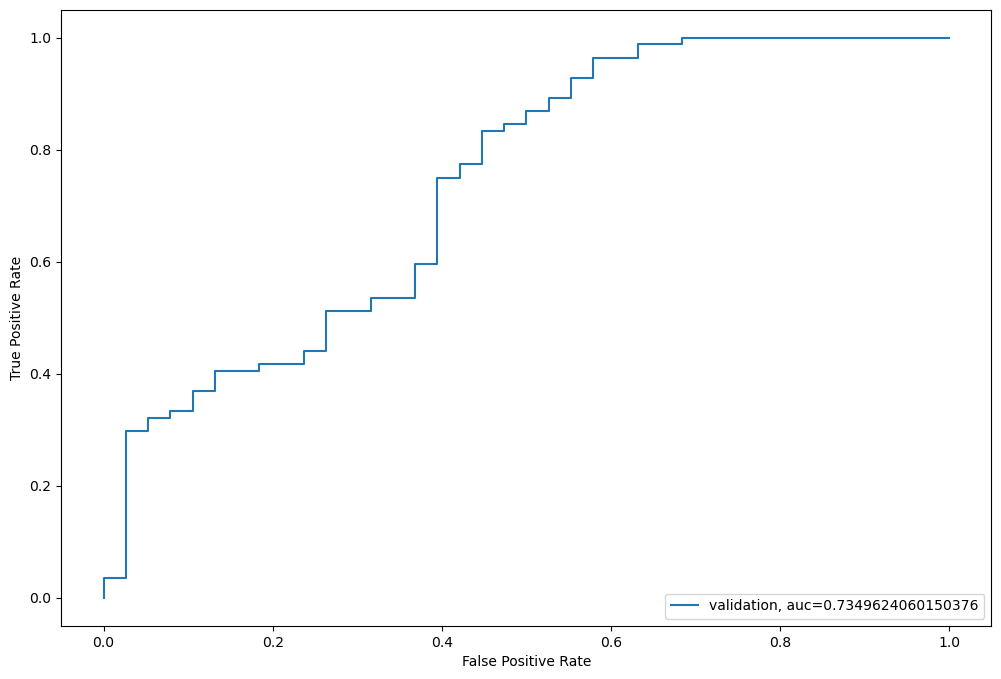

In [55]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
submission['Loan_Status']=pred_test 

In [58]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [59]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('LR kf model.csv')

## 2.Decision Tree 

In [60]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [64]:
from sklearn import tree

In [65]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test)

n1 of kfold 5
accuracy_score 0.7073170731707317
n2 of kfold 5
accuracy_score 0.7235772357723578
n3 of kfold 5
accuracy_score 0.7073170731707317
n4 of kfold 5
accuracy_score 0.7154471544715447
n5 of kfold 5
accuracy_score 0.6885245901639344


In [67]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 

In [68]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [69]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision tree model.csv')

# 3.Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test)

n1 of kfold 5
accuracy_score 0.8130081300813008
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.8130081300813008
n5 of kfold 5
accuracy_score 0.7622950819672131


## GridSearch CV

In [71]:
# to get optimized values of hyperparameters for tuning
from sklearn.model_selection import GridSearchCV

In [72]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}

In [73]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split

In [88]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',       
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, 
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
random_state=1, verbose=0, warm_start=False),
       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
     'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       

pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [89]:
# estimating the optimised value
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=81, random_state=1)

In [92]:
# building new model

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 

pred_test = model.predict(test) 

n1 of kfold 5
accuracy_score 0.8130081300813008
n2 of kfold 5
accuracy_score 0.8211382113821138
n3 of kfold 5
accuracy_score 0.7967479674796748
n4 of kfold 5
accuracy_score 0.8130081300813008
n5 of kfold 5
accuracy_score 0.7950819672131147


In [94]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 

In [95]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [96]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest model.csv')